## **Clustering Analysis of Driver Lifetime Value- Uber, London**

***This project analyzes Driver Lifetime Value (DLV) for Uber in London using clustering techniques to segment drivers based on retention, earnings, and ride activity. The goal is to identify key factors influencing driver longevity, categorize drivers into meaningful groups, and provide actionable business insights to optimize driver retention and maximize revenue. The analysis leverages ride and driver data to estimate the average driver’s lifetime, determine high-value segments, and recommend strategies for improving driver engagement.***

- **Data Preparation:**  
  - Import and merge driver, ride, and timestamp datasets.  
  - Clean and preprocess the data (handle missing values, convert data types, etc.).
- **Exploratory Data Analysis (EDA):**  
  - Generate descriptive statistics and visualizations to understand ride patterns and driver activity.  
  - Identify trends and anomalies in driver behavior and earnings.
- **Feature Engineering:**  
  - Compute key metrics such as driver lifetime, total rides, and earnings per ride.  
  - Develop additional features to capture driver engagement and performance.
- **Clustering Analysis:**  
  - Select and apply appropriate clustering algorithms (e.g., k-means, hierarchical clustering).  
  - Determine the optimal number of clusters using techniques like the elbow method or silhouette scores.
- **Cluster Evaluation and Interpretation:**  
  - Assess cluster quality and consistency.  
  - Characterize each cluster to identify high-value segments and key behavioral patterns.
- **Business Insights and Recommendations:**  
  - Analyze the factors influencing driver lifetime value.  
  - Provide actionable recommendations to improve driver retention and revenue optimization.
- **Reporting and Presentation:**  
  - Compile findings into a clear, comprehensive report for a cross-functional audience.  
  - Present visualizations and insights to support strategic business decisions.

**Objective**
  
We would like to answer some questions after exploring and analyzing the data, questions are :

- Recommend a Driver's Lifetime Value (i.e., the value of a driver to Uber over the entire projected lifetime of a driver).
- What are the main factors that affect a driver's lifetime value?
- What is the average projected lifetime of a driver? That is, once a driver is onboarded, how long do they typically continue driving with Uber?
- Do all drivers act alike? Are there specific segments of drivers that generate more value for Uber than the average driver?
- What actionable recommendations are there for the business?

You can make the following assumptions about the Uber rate card:

- Base Fare 2.00
- Cost per Mile 1.15
- Cost per Minute 0.22
- Service Fee 1.75
- Minimum Fare 5.00
- Maximum Fare 400.00

You can assume that:

- All rides in the data set occured in London
- All timestamps in the data set are in UTC

**Data Description**
  
This project works around three CSV files attached with the following datasets:

1. ***driver_ids.csv***

2. ***ride_ids.csv***
  
3. ***ride_timestamps.csv***
  


### **0. Exploratory Analysis**

In [2]:
# Import the required libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for advanced data visualization

In [3]:
# Read all datasets
# Read the driver_ids.csv file and store the data in a pandas DataFrame called driver_ids.
driver_ids = pd.read_csv('driver_ids.csv')

# Read the ride_timestamps.csv file and store the data in a pandas DataFrame called ride_timestamps.
ride_timestamps = pd.read_csv('ride_timestamps.csv')

# Read the ride_ids.csv file and store the data in a pandas DataFrame called ride_ids.
ride_ids = pd.read_csv('ride_ids.csv')

In [4]:
# print sample of driver_ids data 
driver_ids.sample(2)

,driver_id,driver_onboard_date
619,a3e28ae11607ad68dedbc2baff2210e2,2016-04-23 00:00:00
25,06b1ba06e5505f8218ec8686498f990a,2016-05-11 00:00:00


In [5]:
# Some info about driver_ids data 

# Print shape (num. of rows, num. of columns) 
print('Shape of data: ', driver_ids.shape)
# Print unique of driver id
print('unique of driver id: ', len(driver_ids['driver_id'].unique()) )
# Print Minimum and Maximum value of driver onboard date 
print('Minimum date: ',driver_ids['driver_onboard_date'].min())
print('Maximum date: ',driver_ids['driver_onboard_date'].max())

Shape of data:  (937, 2)
unique of driver id:  937
Minimum date:  2016-03-28 00:00:00
Maximum date:  2016-05-15 00:00:00


In [6]:
# print sample of ride_timestamps data 
ride_timestamps.sample(2)

,ride_id,event,timestamp
918410,f23eaddbb76bd7d7bd45f851b3f59779,requested_at,2016-06-02 21:59:31
113037,1e1262f7282bd6238fcaa50892b254ae,arrived_at,2016-06-15 12:17:35


In [7]:
# Some info about ride_timestamps data 

# Print shape (num. of rows, num. of columns) 
print('Shape of data: ', ride_timestamps.shape)
# Print unique count of ride id
print('unique of ride id: ', len(ride_timestamps['ride_id'].unique()))
# Print count of every value in column Event
ride_timestamps['event'].value_counts()

Shape of data:  (970405, 3)
unique of ride id:  194081


event
requested_at      194081
accepted_at       194081
arrived_at        194081
picked_up_at      194081
dropped_off_at    194081
Name: count, dtype: int64

In [8]:
# print sample of ride_ids data 
ride_ids.sample(2)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
49704,3f2ee0f16084bb99e8423807273c5816,c6023a8067ed6b4291cfa490bdd9c132,2483,435,0
44051,392e07cd00f38f357ae73795619fd0e3,a1447737a10d86618d9409cad2640917,4817,532,100


In [10]:
# Some info about ride_ids data 

# Print shape (num. of rows, num. of columns) 
print('Shape of data: ', ride_ids.shape)
# Print count unique values of driver id
print('unique of driver id: ', len(ride_ids['driver_id'].unique()))
# Print count unique values of ride id
print('unique of ride id: ', len(ride_ids['ride_id'].unique()))
# Description of numeric columns (ride_distance, ride_duration, ride_prime_time)
ride_ids.describe()

Shape of data:  (193502, 5)
unique of driver id:  937
unique of ride id:  193502


,ride_distance,ride_duration,ride_prime_time
count,193502.000000,193502.000000,193502.000000
mean,6955.218266,858.966099,17.305893
std,8929.444606,571.375818,30.825800
min,-2.000000,2.000000,0.000000
25%,2459.000000,491.000000,0.000000
50%,4015.000000,727.000000,0.000000
75%,7193.000000,1069.000000,25.000000
max,724679.000000,28204.000000,500.000000


### **1. Data Engineering**

### **1.1 Calculate the Total Cost of Ride**

You can make the following assumptions about the Uber rate card:

- Base Fare 2.00
- Cost per Mile 1.15
- Cost per Minute 0.22
- Service Fee 1.75
- Minimum Fare 5.00
- Maximum Fare 400.00

We incorporate assumptions regarding the application of the Prime Time rate and Service Fee, aligning them with Uber’s actual pricing model as referenced in various industry sources.

$$
\text{Fare} = \left( \text{Base Fare} + \text{Cost per Mile} \times \text{ride\_distance} + \text{Cost per Minute} \times \text{ride\_duration} \right) \times \left( 1 + \frac{\text{ride\_prime\_time}}{100} \right) + \text{Service Fee}
$$


Next, we verify whether any calculated fares fall below the **Minimum Fare** or exceed the **Maximum Fare** and adjust them accordingly to ensure they remain within the defined limits.

In [14]:
# constant variables used  to calc. total cost of ride (driver's lifetime value)
BASEFARE = 2.00
COSTPERMILE = 1.15
COSTPERMIN = 0.22
SERVICEFEE = 1.75
MINFARE = 5.00
MAXFARE = 400.00
# calc. total life time of ride (convert ride_distance from meters to miles, convert ride_duration from seconds to minutes)
ride_ids['ride_total_cost'] = ( (BASEFARE + (COSTPERMIN*(ride_ids['ride_duration']/60)) + (COSTPERMILE*(ride_ids['ride_distance']*0.000621))) * (1 + ride_ids['ride_prime_time']/100) ) + SERVICEFEE

# Apply lower and upper bound to ride cost (Minimum Fare, Maximum Fare )
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] < MINFARE, MINFARE, ride_ids['ride_total_cost'])
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] > MAXFARE, MAXFARE, ride_ids['ride_total_cost'])
# print first 3 rows in dataframe 
ride_ids.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174


### **1.2 Feature Engineering** (of the rides)

In [15]:
# Pivot the ride events 
ride_events = ride_timestamps.pivot(index = 'ride_id', columns = 'event', values = 'timestamp')
ride_events.head(3)

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09


In [16]:
# Merge ride_ids data with ride events on ride_id 
ride_data = pd.merge(ride_ids, ride_events, on='ride_id')
print('Shape of Ride data :', ride_data.shape)
ride_data.head(3)

Shape of Ride data : (184819, 11)


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31


In [17]:
# Info about ride_data
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184819 entries, 0 to 184818
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   driver_id        184819 non-null  object 
 1   ride_id          184819 non-null  object 
 2   ride_distance    184819 non-null  int64  
 3   ride_duration    184819 non-null  int64  
 4   ride_prime_time  184819 non-null  int64  
 5   ride_total_cost  184819 non-null  float64
 6   accepted_at      184819 non-null  object 
 7   arrived_at       184818 non-null  object 
 8   dropped_off_at   184819 non-null  object 
 9   picked_up_at     184819 non-null  object 
 10  requested_at     184819 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 15.5+ MB


In [18]:
# convert ride distance from meters to kilometers
ride_data["ride_distance"] = ride_data["ride_distance"]/1000
# convert ride duration from seconds to minutes 
ride_data["ride_duration"] = ride_data["ride_duration"]/60

# Create some Features
# It is the time a driver takes to accept a ride once it is requested in minutes.
ride_data['ride_accept_response_time'] = (pd.to_datetime(ride_data['accepted_at']) - pd.to_datetime(ride_data['requested_at'])).astype('timedelta64[s]')/60
# It is the time a driver takes to reach the pickup location once a ride is accepted in minutes.
ride_data['ride_arrival_time'] = (pd.to_datetime(ride_data['arrived_at']) - pd.to_datetime(ride_data['accepted_at'])).astype('timedelta64[s]')/60
# It is the time a driver waits for the rider once the driver reaches the pickup location in minutes.
ride_data['ride_wait_time'] = (pd.to_datetime(ride_data['picked_up_at']) - pd.to_datetime(ride_data['arrived_at'])).astype('timedelta64[s]')/60
# divide ride distance to 3 categories (Short ride, medium ride, long ride) dependant on ride_distance column (KM)
ride_data["ride_length"] = np.where(ride_data["ride_distance"] > ride_data['ride_distance'].quantile(0.33), (np.where(ride_data["ride_distance"] < ride_data['ride_distance'].quantile(0.66), "med_ride", "long_ride")), "short_ride")
# divide ride time to 3 categories (Morning ride, evening ride, night ride) dependant on accepted_at column (time)
ride_data["ride_time"] = np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour > 6, (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 15, "morning_ride", (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 21, "evening_ride", "night_ride")))), "night_ride")
# Convert accepted_at column to date
ride_data['ride_date'] = pd.to_datetime(ride_data['accepted_at']).dt.date
# Print first 3 rows in ride data
ride_data.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_accept_response_time,ride_arrival_time,ride_wait_time,ride_length,ride_time,ride_date
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1.811,5.450000,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,0 days,0 days 00:00:02,0 days,short_ride,night_ride,2016-04-23
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3.362,13.483333,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,0 days,0 days 00:00:03,0 days,med_ride,evening_ride,2016-03-29
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3.282,9.533333,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,0 days,0 days 00:00:04,0 days,med_ride,morning_ride,2016-06-21


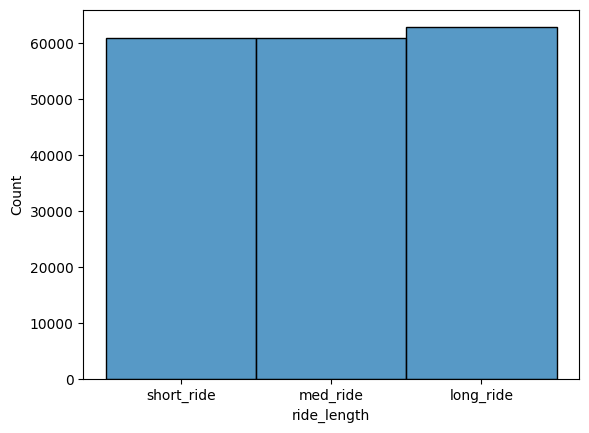

In [19]:
# histogram of ride length categories
sns.histplot(ride_data["ride_length"])
plt.show()

### **1.3 Feature Engineering** (of the drivers)

In [20]:
# calculate driver_perday_ridecount
driver_perday_ridecount = ride_data.pivot_table(index = 'driver_id', columns = 'ride_date', aggfunc='size').fillna(0)
driver_perday_ridecount.head(3)

ride_date,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,...,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26
driver_id,,,,,,,,,,,,,,,,,,,,,
002be0ffdc997bd5c50703158b7c2491,0.0,6.0,0.0,8.0,7.0,5.0,0.0,0.0,7.0,0.0,...,1.0,3.0,0.0,2.0,9.0,3.0,5.0,0.0,0.0,0.0
007f0389f9c7b03ef97098422f902e62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
011e5c5dfc5c2c92501b8b24d47509bc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
driver_info = pd.DataFrame()
# Calc. driver total ride count
driver_info['total_ride_count'] = ride_data.pivot_table(index=['driver_id'], aggfunc='size')
# Calc. driver total ride distance
driver_info['total_distance']  = ride_ids.groupby('driver_id')['ride_distance'].sum()
# Calc. driver total ride duration
driver_info['total_duration']  = ride_ids.groupby('driver_id')['ride_duration'].sum()
# Calc. driver lifetime value (total revenue)
driver_info['lifetime_value'] = ride_ids.groupby('driver_id')['ride_total_cost'].sum()
# Calc. mean driver count ride per day
driver_info['perday_ridecount_mean'] = driver_perday_ridecount.mean(axis=1)
# Calc. mean of ride accept responce time for every driver
driver_info['accept_response_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_accept_response_time': 'mean'})).iloc[:,0]
# Calc. mean of ride arrival time for every driver
driver_info['arrival_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_arrival_time': 'mean'})).iloc[:,0]
# Calc. mean of ride wait time for every driver
driver_info['wait_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_wait_time': 'mean'})).iloc[:,0]
# count total no. of short/medium/long evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_length', aggfunc='size') ,on='driver_id')
# count total no. of day/night/night evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_time', aggfunc='size') ,on='driver_id')

# fill nan value with 0
driver_info = driver_info.fillna(0).reset_index()
driver_info.head(5)


,driver_id,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride
0,002be0ffdc997bd5c50703158b7c2491,277,1740287,221238,3560.056648,3.043956,0 days,0 days 00:00:02,0 days,79,103,95,103.0,85.0,89.0
1,007f0389f9c7b03ef97098422f902e62,31,117531,20497,321.434698,0.340659,0 days,0 days 00:00:02,0 days,5,15,11,24.0,6.0,1.0
2,011e5c5dfc5c2c92501b8b24d47509bc,34,269653,29205,482.299206,0.373626,0 days,0 days 00:00:03,0 days,11,11,12,24.0,8.0,2.0
3,0152a2f305e71d26cc964f8d4411add9,191,1471239,174521,2610.189071,2.098901,0 days,0 days 00:00:03,0 days,99,51,41,17.0,67.0,107.0
4,01674381af7edd264113d4e6ed55ecda,375,3123644,357443,5379.644866,4.120879,0 days,0 days 00:00:03,0 days,157,111,107,0.0,350.0,25.0


In [24]:
# Fix aggregation method
onboard_data = pd.merge(
    ride_data.groupby('driver_id').agg({'accepted_at': 'max'}),
    driver_ids, 
    on='driver_id'
)

# Fix timedelta conversion
onboard_data['driver_duration'] = (pd.to_datetime(onboard_data['accepted_at']) - pd.to_datetime(onboard_data['driver_onboard_date'])).dt.days

# Keep only relevant columns
onboard_data = onboard_data[['driver_id', 'driver_duration']]

# Display result
onboard_data.head()


,driver_id,driver_duration
0,002be0ffdc997bd5c50703158b7c2491,86
1,007f0389f9c7b03ef97098422f902e62,85
2,011e5c5dfc5c2c92501b8b24d47509bc,68
3,0152a2f305e71d26cc964f8d4411add9,64
4,01674381af7edd264113d4e6ed55ecda,56


In [25]:
driver_info = pd.merge(driver_info, onboard_data, on= 'driver_id' , how='inner')
driver_info

,driver_id,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride,driver_duration
0,002be0ffdc997bd5c50703158b7c2491,277,1740287,221238,3560.056648,3.043956,0 days,0 days 00:00:02,0 days,79,103,95,103.0,85.0,89.0,86
1,007f0389f9c7b03ef97098422f902e62,31,117531,20497,321.434698,0.340659,0 days,0 days 00:00:02,0 days,5,15,11,24.0,6.0,1.0,85
2,011e5c5dfc5c2c92501b8b24d47509bc,34,269653,29205,482.299206,0.373626,0 days,0 days 00:00:03,0 days,11,11,12,24.0,8.0,2.0,68
3,0152a2f305e71d26cc964f8d4411add9,191,1471239,174521,2610.189071,2.098901,0 days,0 days 00:00:03,0 days,99,51,41,17.0,67.0,107.0,64
4,01674381af7edd264113d4e6ed55ecda,375,3123644,357443,5379.644866,4.120879,0 days,0 days 00:00:03,0 days,157,111,107,0.0,350.0,25.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,ff419a3476e21e269e340b5f1f05414e,242,2002400,246308,3537.441127,2.659341,0 days,0 days 00:00:04,0 days,98,56,88,56.0,161.0,25.0,61
833,ff714a67ba8c6a108261cd81e3b77f3a,485,2834765,442492,6285.948397,5.329670,0 days,0 days 00:00:02,0 days,161,155,169,164.0,308.0,13.0,81
834,fff482c704d36a1afe8b8978d5486283,35,174394,27693,380.579655,0.384615,0 days,0 days 00:00:03,0 days,11,7,17,1.0,34.0,0.0,34
835,fffecccc49436c5389075b13209f0dfa,406,2924913,353974,6050.600054,4.461538,0 days,0 days 00:00:03,0 days,137,141,128,135.0,153.0,118.0,51


### **2. Data Exploration and Insights**

In [26]:
# Get description of data 
driver_info.describe()


,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride,driver_duration
count,837.000000,8.370000e+02,837.000000,837.000000,837.000000,837,837,837,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,220.082437,1.528516e+06,189242.789725,2979.103812,2.418488,0 days 00:00:00,0 days 00:00:03,0 days 00:00:00,74.874552,72.569892,72.637993,84.874552,85.178017,50.029869,55.075269
std,178.180347,1.259931e+06,154009.144305,2416.298144,1.958026,0 days 00:00:00,0 days 00:00:01,0 days 00:00:00,60.894880,60.813653,62.422290,81.688592,92.089711,64.935745,21.721934
min,3.000000,9.895000e+03,1712.000000,25.687087,0.032967,0 days 00:00:00,0 days 00:00:01,-1 days +23:59:59,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,44.000000,3.390140e+05,38363.000000,618.060833,0.483516,0 days 00:00:00,0 days 00:00:02,0 days 00:00:00,18.000000,14.000000,14.000000,17.000000,15.000000,5.000000,42.000000
50%,224.000000,1.451389e+06,189906.000000,2958.450547,2.461538,0 days 00:00:00,0 days 00:00:03,0 days 00:00:00,71.000000,72.000000,72.000000,60.000000,44.000000,22.000000,57.000000
75%,330.000000,2.311846e+06,288097.000000,4475.228280,3.626374,0 days 00:00:00,0 days 00:00:04,0 days 00:00:00,114.000000,111.000000,112.000000,140.000000,139.000000,74.000000,73.000000
max,919.000000,6.628201e+06,779797.000000,12347.102999,10.098901,0 days 00:00:00,0 days 00:00:11,0 days 00:00:00,335.000000,294.000000,313.000000,404.000000,515.000000,470.000000,90.000000


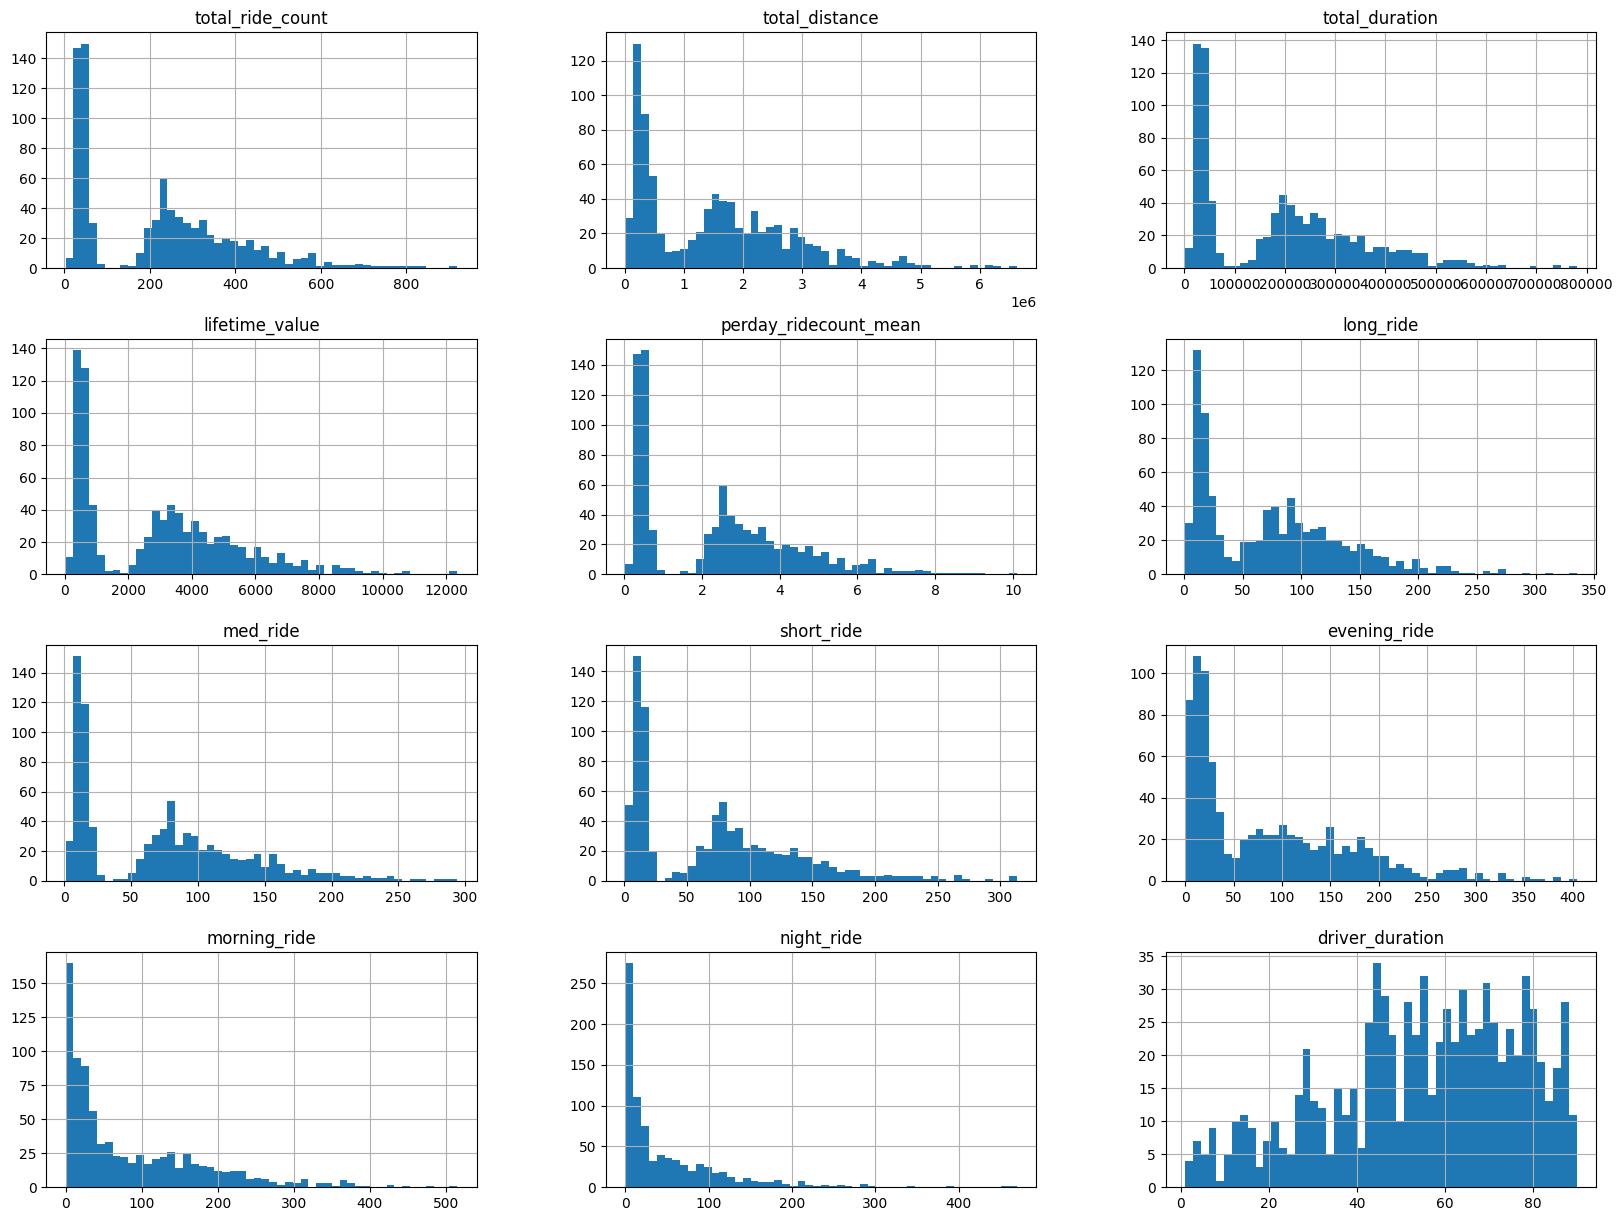

In [27]:
# Plot Histgrams of data 
driver_info.hist(bins=50, figsize=(20,15))
plt.show()

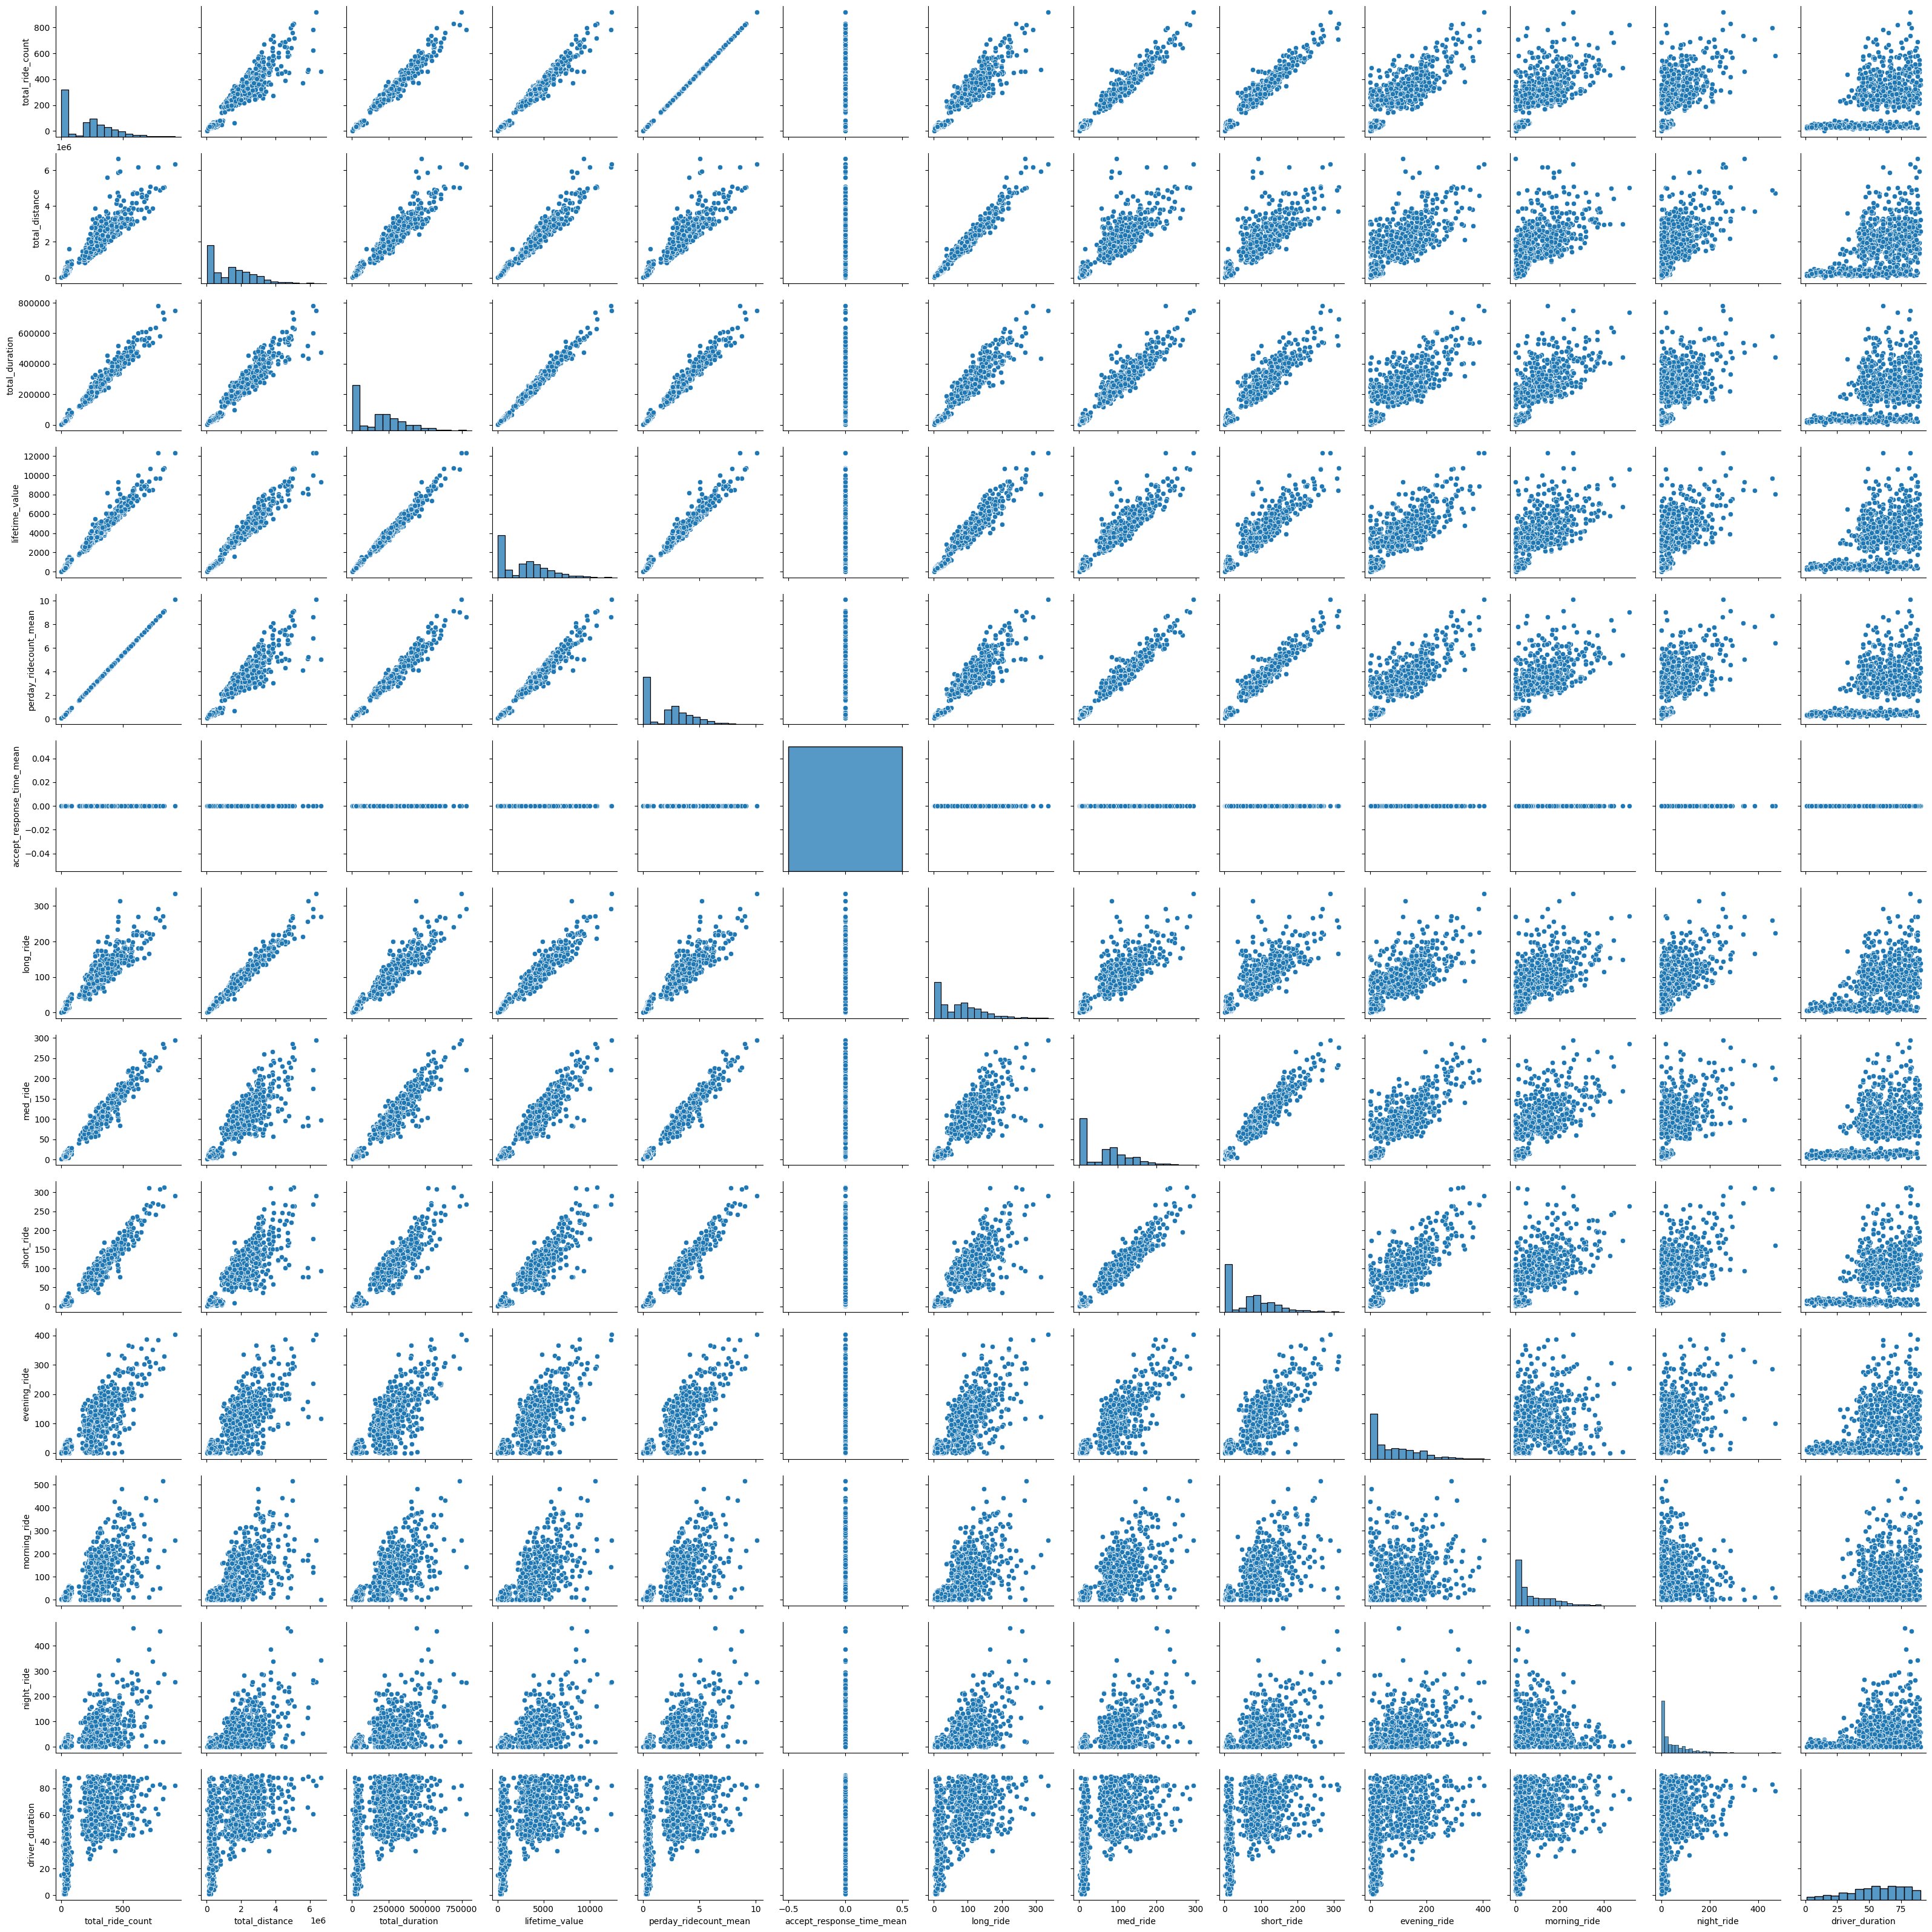

In [28]:
# scatter plots of data 
sns.pairplot(driver_info)

### **3. Main Factors Affecting DLV**

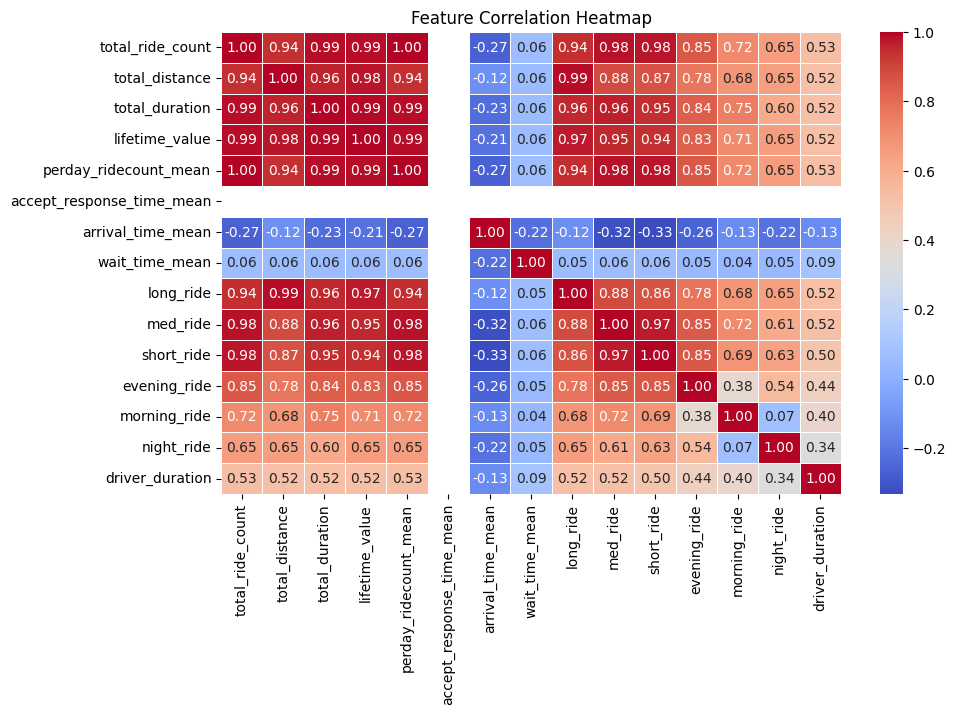

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_driver_info = driver_info.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_driver_info.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [34]:
import pandas as pd

# Select only numeric columns
numeric_driver_info = driver_info.select_dtypes(include=['number'])

# Ensure 'lifetime_value' exists before computing correlation
if 'lifetime_value' in numeric_driver_info.columns:
    corr_lifetime_value = numeric_driver_info.corr()['lifetime_value'].sort_values(ascending=False)
    
    # Convert to DataFrame and exclude 'lifetime_value' itself
    corr_df = pd.DataFrame(corr_lifetime_value).iloc[1:]
    
    # Display results
    print(corr_df)
else:
    print("Column 'lifetime_value' not found in numeric data. Check column names.")


                           lifetime_value
total_duration                   0.994194
total_ride_count                 0.987069
perday_ridecount_mean            0.987069
total_distance                   0.978453
long_ride                        0.971439
med_ride                         0.954142
short_ride                       0.940301
evening_ride                     0.833416
morning_ride                     0.710687
night_ride                       0.652164
driver_duration                  0.523453
wait_time_mean                   0.057440
arrival_time_mean               -0.213454
accept_response_time_mean             NaN


### **4. Average Projected Lifetime of a Driver**

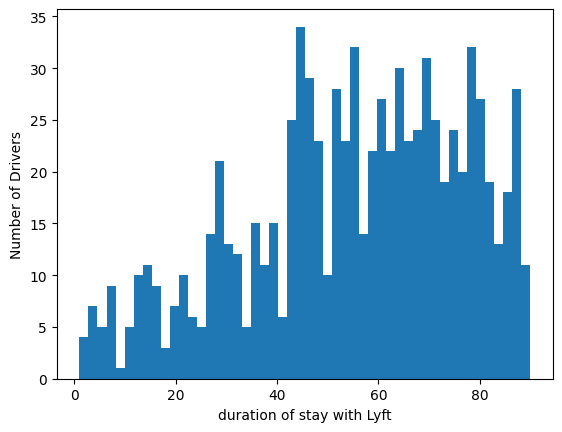

In [35]:
driver_info['driver_duration'].plot.hist(bins=50)
plt.xlabel('duration of stay with Lyft')
plt.ylabel('Number of Drivers')
plt.show()

In [36]:
driver_info['driver_duration'].describe()

count    837.000000
mean      55.075269
std       21.721934
min        1.000000
25%       42.000000
50%       57.000000
75%       73.000000
max       90.000000
Name: driver_duration, dtype: float64

***Average Projected Lifetime of a driver is around 55 days.***

### **5. Driver Behavior Analysis: A Clustering Approach**

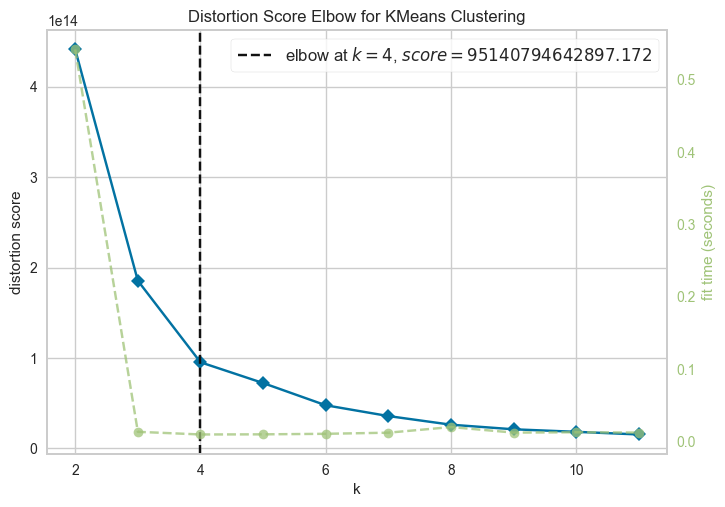

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np

# Drop non-numeric columns like driver_id
df = driver_info.drop(columns=['driver_id'], errors='ignore')

# Convert timedelta columns to numeric (days)
for col in df.select_dtypes(include=['timedelta64']).columns:
    df[col] = df[col].dt.days  # Convert timedelta to number of days

# Ensure all columns are numeric
df = df.select_dtypes(include=[np.number])

# Initialize model
model = KMeans(random_state=42)

# Use Elbow Method to determine optimal clusters
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df)
visualizer.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Make a copy to avoid modifying the original dataset
df = driver_info.copy()

# Drop non-numeric columns like 'driver_id'
df = df.drop(columns=['driver_id'], errors='ignore')

# Convert timedelta columns to numeric (days)
for col in df.select_dtypes(include=['timedelta64']).columns:
    df[col] = df[col].dt.days  # Convert timedelta to number of days

# Ensure all columns are numeric
df = df.select_dtypes(include=[np.number])

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(df)

# Print cluster assignments
df['cluster'] = kmeans.labels_
print(df.head())


   total_ride_count  total_distance  total_duration  lifetime_value  \
0               277         1740287          221238     3560.056648   
1                31          117531           20497      321.434698   
2                34          269653           29205      482.299206   
3               191         1471239          174521     2610.189071   
4               375         3123644          357443     5379.644866   

   perday_ridecount_mean  accept_response_time_mean  arrival_time_mean  \
0               3.043956                          0                  0   
1               0.340659                          0                  0   
2               0.373626                          0                  0   
3               2.098901                          0                  0   
4               4.120879                          0                  0   

   wait_time_mean  long_ride  med_ride  short_ride  evening_ride  \
0               0         79       103          95         1

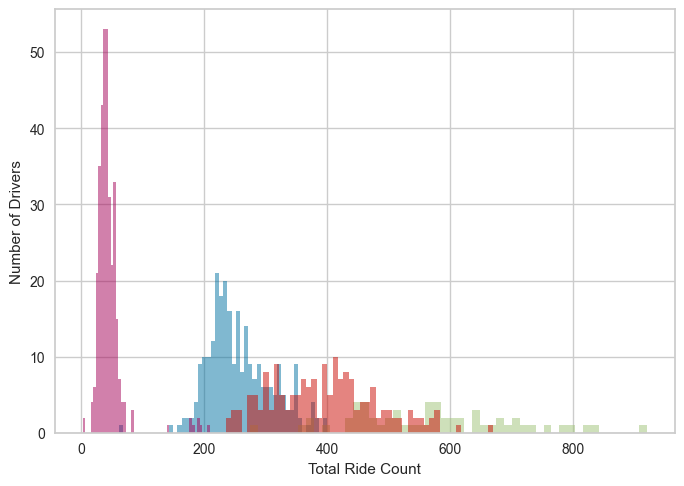

In [42]:
# Add the cluster labels to the dataframe
driver_info['cluster'] = kmeans.labels_

# Plot the distribution of total ride count by cluster
driver_info.groupby('cluster')['total_ride_count'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Ride Count')
plt.ylabel('Number of Drivers')
plt.show()

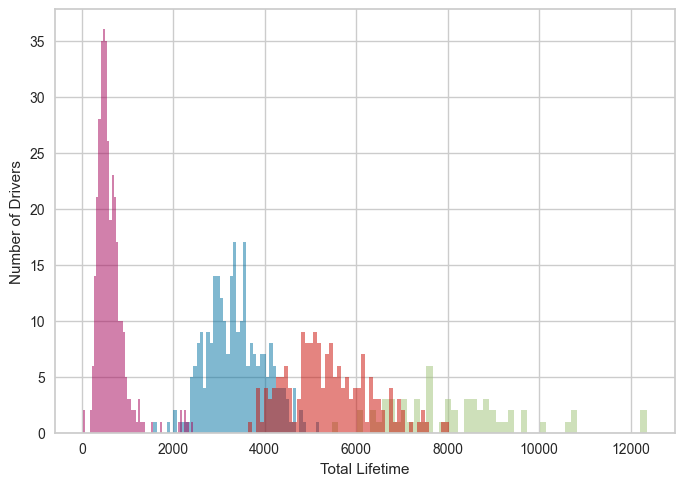

In [43]:
# Plot the distribution of total earnings by cluster
driver_info.groupby('cluster')['lifetime_value'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Lifetime')
plt.ylabel('Number of Drivers')
plt.show()

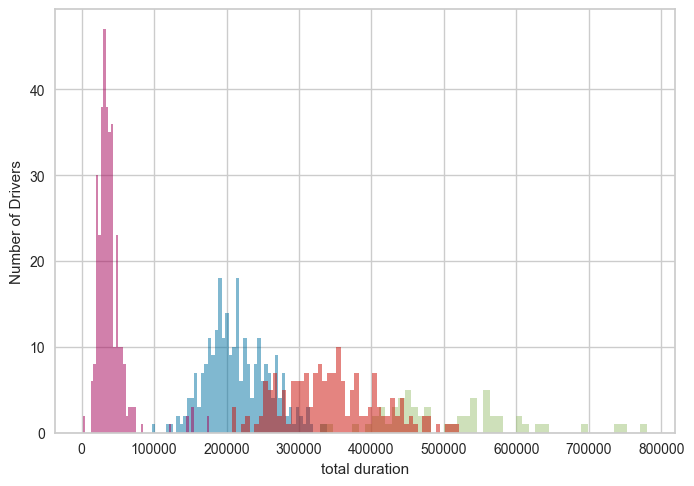

In [44]:
# Plot the distribution of total duration by cluster
driver_info.groupby('cluster')['total_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

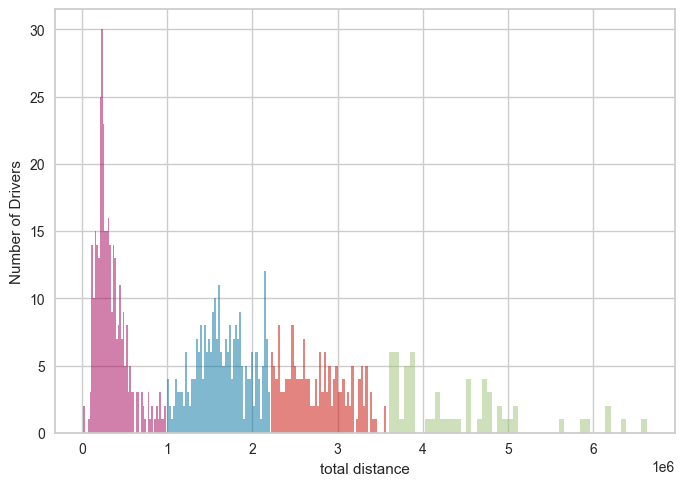

In [45]:
# Plot the distribution of total distance by cluster
driver_info.groupby('cluster')['total_distance'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total distance')
plt.ylabel('Number of Drivers')
plt.show()

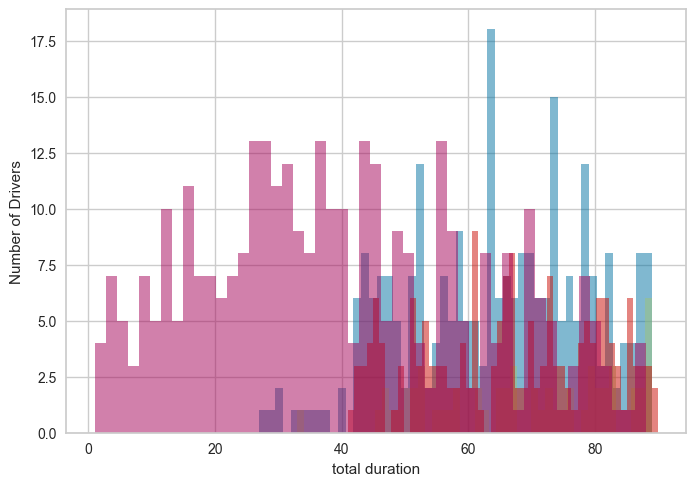

In [46]:
# Plot the distribution of driver's lifetime by cluster
driver_info.groupby('cluster')['driver_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

In [50]:
# Ensure 'cluster' column exists
if 'cluster' in driver_info.columns:
    # Use a list for column selection instead of a tuple
    grouped_df = driver_info.groupby('cluster')[
        ['lifetime_value', 'med_ride', 'perday_ridecount_mean', 'total_ride_count', 
         'short_ride', 'total_duration', 'total_distance', 'long_ride', 'evening_ride',
         'night_ride', 'morning_ride', 'driver_duration', 'wait_time_mean']
    ].agg('mean')

    # Display the grouped dataframe
    print(grouped_df)
else:
    print("Error: 'cluster' column not found in driver_info. Ensure KMeans clustering has been applied.")


         lifetime_value    med_ride  perday_ridecount_mean  total_ride_count  \
cluster                                                                        
0           3363.981468   87.397727               2.827381        257.291667   
1           8137.326695  178.965517               6.289314        572.327586   
2           5381.529181  131.637427               4.347150        395.590643   
3            619.803328   13.889535               0.493324         44.892442   

         short_ride  total_duration  total_distance   long_ride  evening_ride  \
cluster                                                                         
0         88.484848   215617.162879    1.644211e+06   81.409091    100.943182   
1        183.086207   507088.017241    4.425166e+06  210.275862    219.448276   
2        129.146199   343595.760234    2.757276e+06  134.807018    147.555556   
3         13.764535    38684.023256    3.405301e+05   17.238372     18.694767   

         night_ride  morning_rid

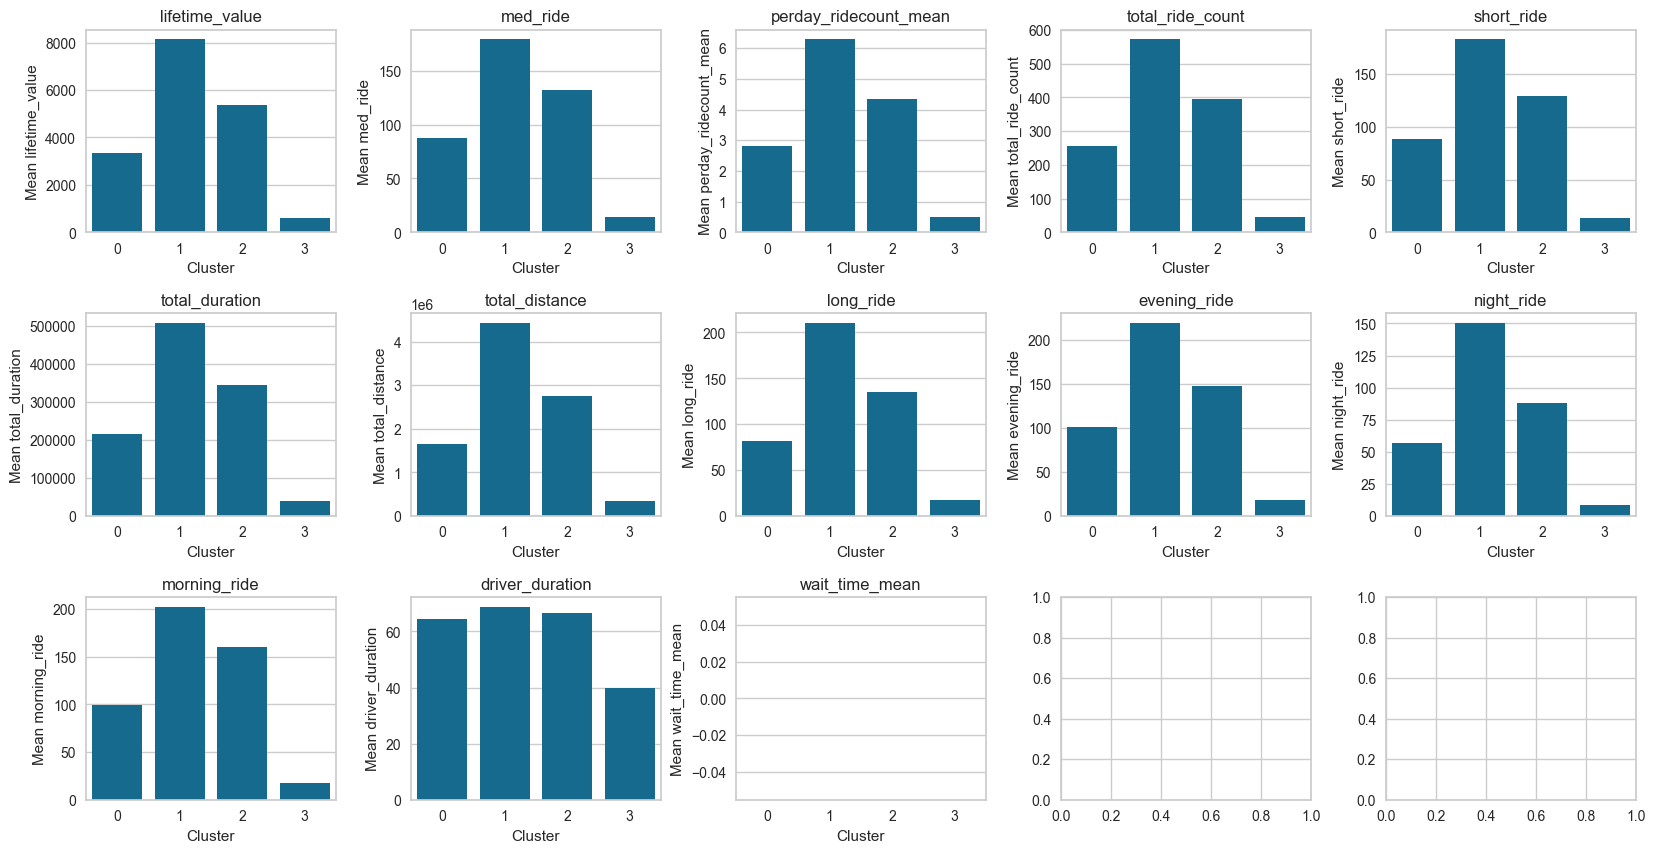

In [51]:
# create subplots for each column in the grouped dataframe
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# loop through each column in the grouped dataframe and plot it in a subplot
for i, column in enumerate(grouped_df.columns):
    sns.barplot(x=grouped_df.index, y=grouped_df[column], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(column)
    axes[i//5, i%5].set_xlabel('Cluster')
    axes[i//5, i%5].set_ylabel('Mean ' + column)

plt.show()

Based on the clustering results, we can categorize drivers into four distinct groups: Bad Drivers, Fair Drivers, Good Drivers, and Excellent Drivers.

- Cluster 0 - Bad Drivers:
  These drivers exhibit low total lifetime value, ride count, duration, and distance. Potential reasons for this may include poor customer service, low demand for their services, or consistently low fares.

- Cluster 2 - Fair Drivers:
    This group represents drivers with a moderate total lifetime value, ride count, duration, and distance. While they may not experience high demand, they also do not face significant issues that negatively impact their earnings.

- Cluster 1 - Good Drivers:
    These drivers have a higher total lifetime value, ride count, duration, and distance than those in the previous clusters. Their steady demand and positive reputation contribute to better earnings and job stability.

- Cluster 3 - Excellent Drivers:
    The top-performing drivers fall into this category, boasting the highest total lifetime value, ride count, and total driving metrics. These individuals are likely in high demand, known for exceptional service quality, leading to maximum earnings.

### **5. Actionable Business Recommendations Based on Clustering Analysis**

Based on the clustering analysis of driver performance, the following strategic recommendations can enhance business efficiency and driver engagement:

- Retain High-Performing Drivers:
    Prioritize retention strategies for Good and Excellent drivers, as they contribute the most to revenue and have higher ride frequency. Providing incentives, rewards, and priority access to high-demand areas can encourage them to stay with the platform.

- Enhance Performance of Fair Drivers:
    Implement targeted initiatives to elevate Fair drivers into the Good or Excellent category. This could include personalized coaching, increased access to high-demand ride zones, and performance-based rewards.

- Address Challenges of Low-Performing Drivers:
    Identify and mitigate key issues affecting Bad drivers, such as low earnings, low ride frequency, or short ride durations. Offering additional training, optimizing ride allocation, and addressing customer feedback can help improve their performance.

- Implement Personalized Incentives & Training Programs:
    Develop customized incentive structures and training sessions tailored to each cluster. High performers may benefit from exclusive perks, while lower-tier drivers could receive skill-building workshops and operational support to improve their efficiency.

- Leverage Clustering for Dynamic Pricing Optimization:
    Use clustering insights to adjust pricing dynamically based on driver performance, demand patterns, and availability in specific areas. This ensures optimal fare structures that balance driver earnings with rider affordability.

- Continuous Performance Monitoring & Reassessment:
    Establish a regular performance evaluation framework to track driver progress, refine clustering strategies, and ensure appropriate allocation of incentives and support. This will help maintain an adaptive, data-driven approach to driver management.

By implementing these recommendations, the business can enhance driver retention, optimize earnings, and improve overall operational efficiency.